In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('heart_v2.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
cholestrol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
heart disease,270.0,0.444444,0.497827,0.0,0.0,0.0,1.0,1.0


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
BP,0
cholestrol,0
heart disease,0


In [ ]:
data.duplicated().sum()

0

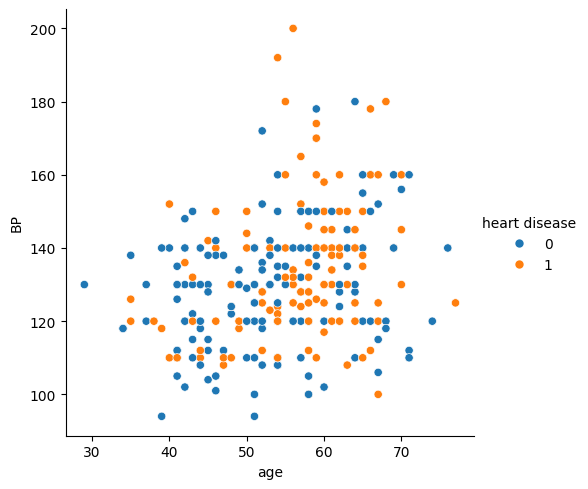

In [ ]:
sns.relplot(data=data,x='age',y='BP',hue='heart disease')

##here the most of the desease people are of age greater 50 and BP greater than 120


<ipython-input-9-67f5a22b11e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

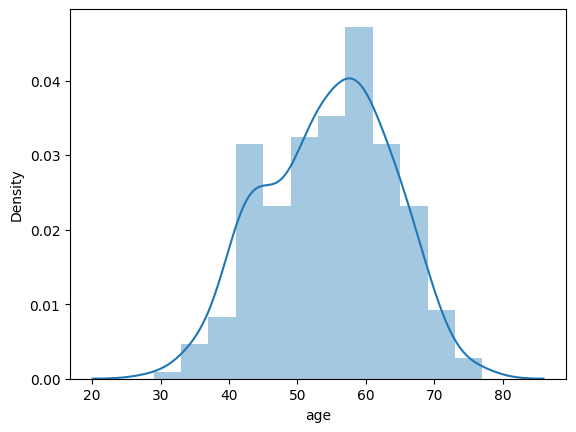

In [ ]:
sns.distplot(data['age'])

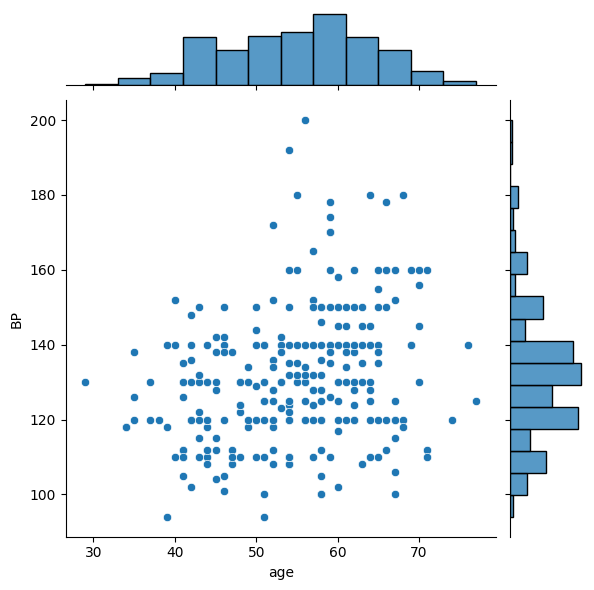

In [ ]:
sns.jointplot(data=data,x='age',y='BP')

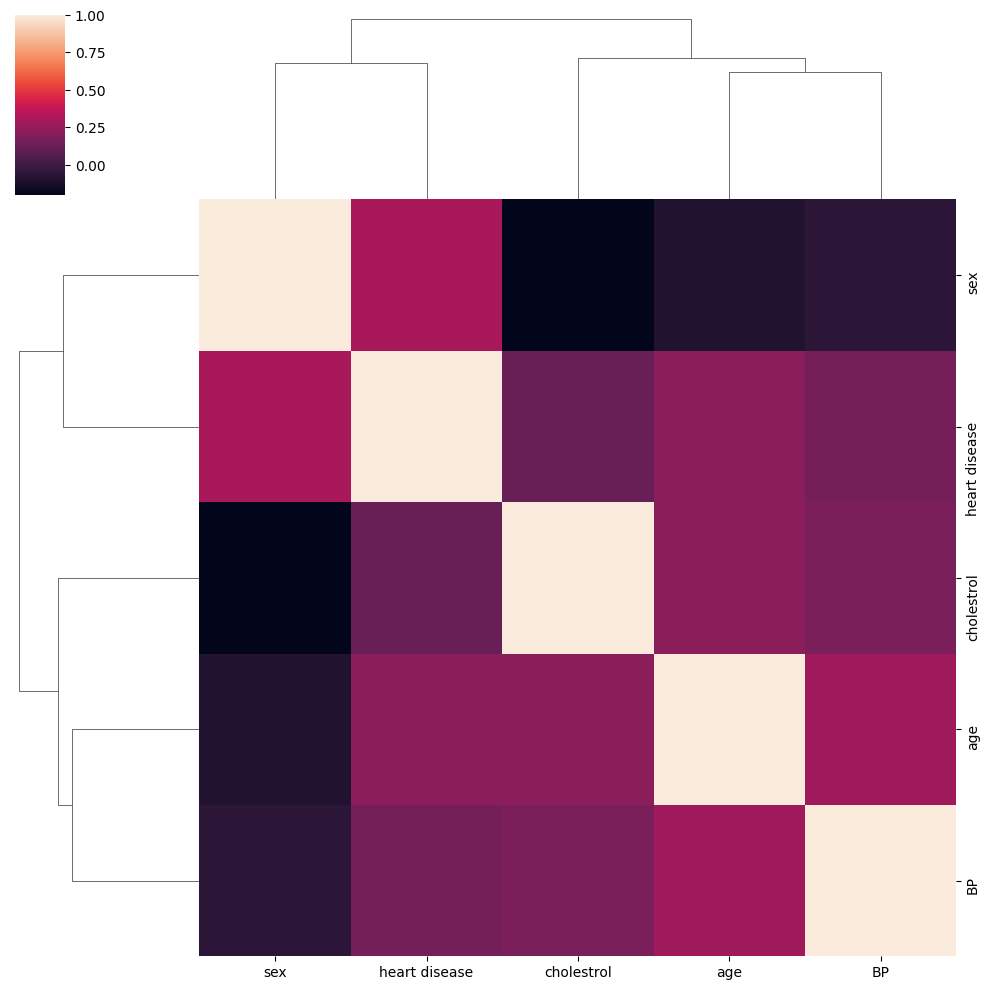

In [ ]:
sns.clustermap(data.corr())

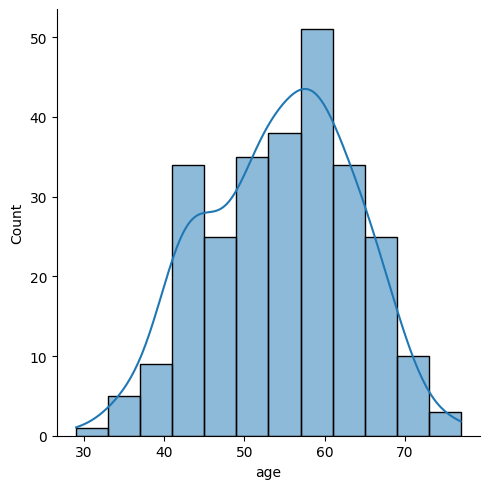

In [ ]:
sns.displot(data['age'] ,kde=True )

<Axes: xlabel='age', ylabel='Density'>

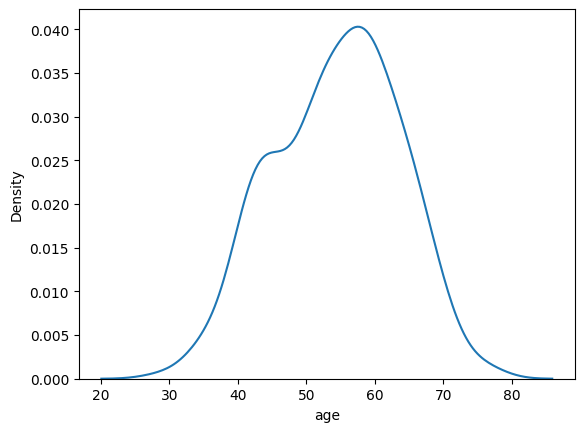

In [ ]:
sns.kdeplot(data['age'])

<Axes: xlabel='age', ylabel='BP'>

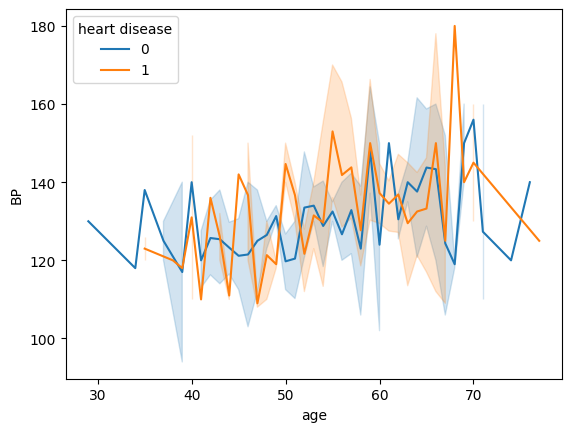

In [ ]:
sns.lineplot(data=data,x='age',y='BP',hue='heart disease')

<Axes: xlabel='age', ylabel='Proportion'>

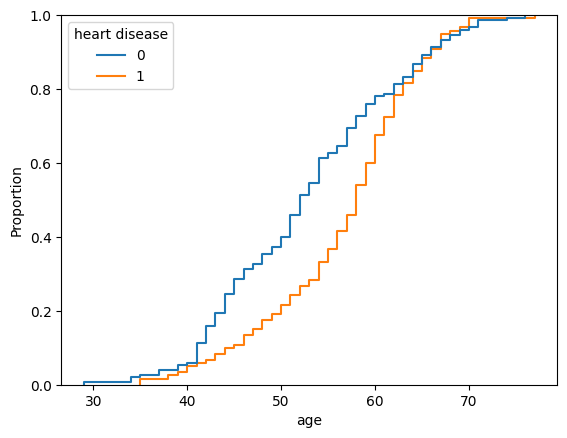

In [ ]:
sns.ecdfplot(data=data,x='age',hue='heart disease')

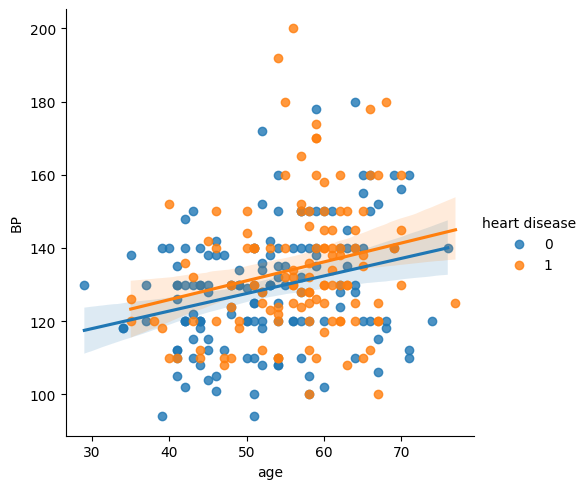

In [ ]:
sns.lmplot(data=data,x='age',y='BP',hue='heart disease')

In [ ]:
data.corr()

,age,sex,BP,cholestrol,heart disease
age,1.000000,-0.094401,0.273053,0.220056,0.212322
sex,-0.094401,1.000000,-0.062693,-0.201647,0.297721
BP,0.273053,-0.062693,1.000000,0.173019,0.155383
cholestrol,0.220056,-0.201647,0.173019,1.000000,0.118021
heart disease,0.212322,0.297721,0.155383,0.118021,1.000000


<Axes: >

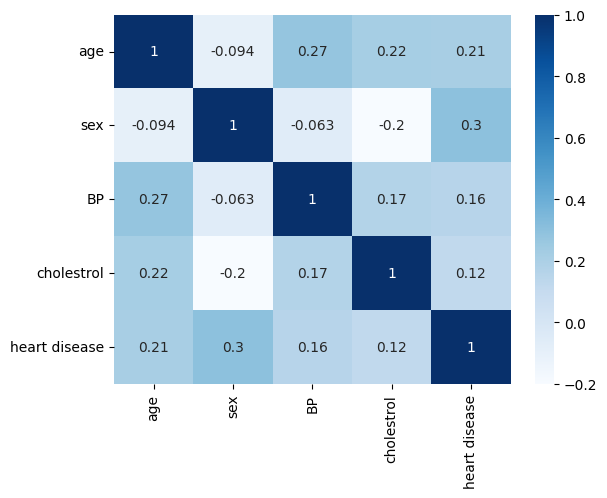

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [ ]:
#will create a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
x=data.drop('heart disease',axis=1)
y=data['heart disease']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
clf=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=6)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6)

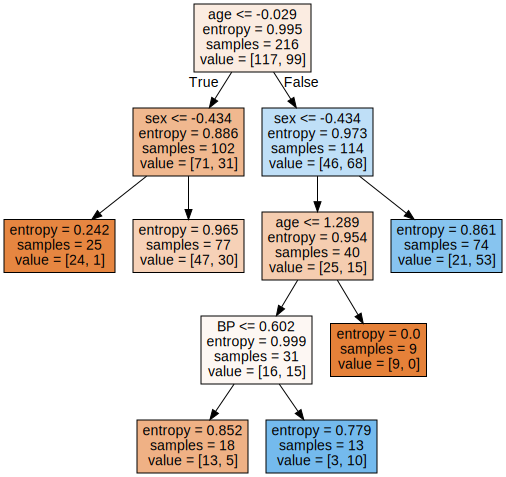

In [ ]:
#will plot the tree
tree=export_graphviz(clf,feature_names=x.columns,filled=True)
graph=graphviz.Source(tree)
graph

In [ ]:
clf.predict(x_test)

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
accuracy_score(y_test,clf.predict(x_test))

0.6296296296296297

In [ ]:
accuracy_score(y_train,clf.predict(x_train))

0.7222222222222222

In [ ]:
clf.score(x_test,y_test)

0.6296296296296297

In [ ]:
clf.score(x_train,y_train)

0.7222222222222222

In [ ]:
confusion_matrix(y_test,clf.predict(x_test))

array([[24,  9],
       [11, 10]])

In [ ]:
classification_report(y_test,clf.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       0.69      0.73      0.71        33\n           1       0.53      0.48      0.50        21\n\n    accuracy                           0.63        54\n   macro avg       0.61      0.60      0.60        54\nweighted avg       0.62      0.63      0.63        54\n'